### Import Required Libraries and Set Up Environment Variables

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time

Most Streamed Spotify Songs 2023
https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

* **track_name** : *Name of the song*
* **artist(s)_name** : *Name of the artist(s) of the song*
* **artist_count** : *Number of artists contributing to the song*
* **released_year** : *Year when the song was released*
* **released_month** : *Month when the song was released*
* **released_day** : *Day of the month when the song was released*
* **in_spotify_playlists** : *Number of Spotify playlists the song is included in*
* **in_spotify_charts** : *Presence and rank of the song on Spotify charts*
* **streams** : *Total number of streams on Spotify*
* **in_apple_playlists** : *Number of Apple Music playlists the song is included in*
* **in_apple_charts** : *Presence and rank of the song on Apple Music charts*
* **in_deezer_playlists** : *Number of Deezer playlists the song is included in*
* **in_deezer_charts** : *Presence and rank of the song on Deezer charts*
* **in_shazam_charts** : *Presence and rank of the song on Shazam charts*
* **bpm** : *Beats per minute, a measure of song tempo*
* **key** : *Key of the song*
* **mode** : *Mode of the song (major or minor)*
* **danceability_%** : *Percentage indicating how suitable the song is for dancing*
* **valence_%** : *Positivity of the song's musical content*
* **energy_%** : *Perceived energy level of the song*
* **acousticness_%** : *Amount of acoustic sound in the song*
* **instrumentalness_%** : *Amount of instrumental content in the song*
* **liveness_%** : *Presence of live performance elements*
* **speechiness_%** : *Amount of spoken words in the song*

In [13]:
# Import CSV, convert three data columns as a single dateTime object.
csv_path = 'Resources/spotify-2023-data.csv'

# note: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated.
# Combine the desired columns with pd.to_datetime (see above frame)
df = pd.read_csv(csv_path, encoding='ISO-8859-1', parse_dates = { 'release_date' : ['released_year', 'released_month', 'released_day']})

display(df.head())
display(df.info())

C:\Users\black\AppData\Local\Temp\ipykernel_33688\2219312609.py:6: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(csv_path, encoding='ISO-8859-1', parse_dates = { 'release_date' : ['released_year', 'released_month', 'released_day']})


,release_date,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2023-07-14,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,...,125,B,Major,80,89,83,31,0,8,4
1,2023-03-23,LALA,Myke Towers,1,1474,48,133716286,48,126,58,...,92,C#,Major,71,61,74,7,0,10,4
2,2023-06-30,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,...,138,F,Major,51,32,53,17,0,31,6
3,2019-08-23,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,...,170,A,Major,55,58,72,11,0,11,15
4,2023-05-18,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,...,144,A,Minor,65,23,80,14,63,11,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   release_date          953 non-null    datetime64[ns]
 1   track_name            953 non-null    object        
 2   artist(s)_name        953 non-null    object        
 3   artist_count          953 non-null    int64         
 4   in_spotify_playlists  953 non-null    int64         
 5   in_spotify_charts     953 non-null    int64         
 6   streams               953 non-null    object        
 7   in_apple_playlists    953 non-null    int64         
 8   in_apple_charts       953 non-null    int64         
 9   in_deezer_playlists   953 non-null    object        
 10  in_deezer_charts      953 non-null    int64         
 11  in_shazam_charts      903 non-null    object        
 12  bpm                   953 non-null    int64         
 13  key                 

None

If there are mixed fields/types in a single column, read_csv will read them
as objects.  In the next block, we need to clean this data and make them uniform types:

Convert to numeric / int64:
streams               953 non-null    object 
in_deezer_playlists   953 non-null    object 
in_shazam_charts      903 non-null    object   

Convert to string:   
track_name            953 non-null    object        
artist(s)_name        953 non-null    object  
key                   858 non-null    object        
mode                  953 non-null    object 

In [14]:
#######################################
# Convert three columns of objects to numeric:
# errors='coerce' argument will replace all non-numeric values with NaN.)
#######################################
df_clean = df.copy()

cols = ['streams','in_deezer_playlists','in_shazam_charts']
df_clean[cols] = df_clean[cols].apply(pd.to_numeric, errors='coerce')
# df_clean[cols] = pd.to_numeric(df_clean[cols],errors='coerce')

###################################
# Convert four columns of objects to strings:  
###################################
str_cols = ['track_name','artist(s)_name','key','mode']
df_clean[str_cols] = df_clean[str_cols].astype('string')

display(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   release_date          953 non-null    datetime64[ns]
 1   track_name            953 non-null    string        
 2   artist(s)_name        953 non-null    string        
 3   artist_count          953 non-null    int64         
 4   in_spotify_playlists  953 non-null    int64         
 5   in_spotify_charts     953 non-null    int64         
 6   streams               952 non-null    float64       
 7   in_apple_playlists    953 non-null    int64         
 8   in_apple_charts       953 non-null    int64         
 9   in_deezer_playlists   874 non-null    float64       
 10  in_deezer_charts      953 non-null    int64         
 11  in_shazam_charts      896 non-null    float64       
 12  bpm                   953 non-null    int64         
 13  key                 

None

In [15]:
#################################################
# Reformat Streams Column to Millions of Streams:
#################################################
df_mils = df_clean.copy()
df_mils['streams'] = df_mils['streams'].apply(lambda x: round(x/1000000, 4))
df_mils = df_mils.rename(columns={'streams':'mils_of_streams'})
display(df_mils.head())


# del combined_unemployed_data['Country Code_y']

,release_date,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,mils_of_streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2023-07-14,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141.3817,43,263,45.0,...,125,B,Major,80,89,83,31,0,8,4
1,2023-03-23,LALA,Myke Towers,1,1474,48,133.7163,48,126,58.0,...,92,C#,Major,71,61,74,7,0,10,4
2,2023-06-30,vampire,Olivia Rodrigo,1,1397,113,140.0040,94,207,91.0,...,138,F,Major,51,32,53,17,0,31,6
3,2019-08-23,Cruel Summer,Taylor Swift,1,7858,100,800.8408,116,207,125.0,...,170,A,Major,55,58,72,11,0,11,15
4,2023-05-18,WHERE SHE GOES,Bad Bunny,1,3133,50,303.2363,84,133,87.0,...,144,A,Minor,65,23,80,14,63,11,6


In [16]:
############################################
# Investigate rows with missing values
############################################
display(df_clean.isna().sum())

# By calling any() on result of isnull(), check if each row and column contains 
# at least one NaN. Axis=1: applied to rows.

# Use the any() method that returns True if there is at least one True in each row/column. 
# By default, it is applied to columns. If axis=1, it is applied to rows.
display(df_clean.isnull().any(axis = 1).sum())

# isnull() is an alias for isna(), and both are used interchangeably
na_data = df_clean[df_clean.isna().any(axis=1)]
# null_data = df_clean[df_clean.isnull().any(axis=1)]
display(na_data[["artist(s)_name", "streams", "in_deezer_playlists", "in_shazam_charts"]].reset_index(drop=True).head(20))
# display(null_data[["artist(s)_name", "streams", "in_deezer_playlists", "in_shazam_charts"]].reset_index().head(20))

# df_issues = pd.isna(df_clean[["streams".]) 
# display(df_clean[df_issues])
# df_issues = pd.isna(df_clean["in_deezer_playlists"]) 
# display(df_clean[df_issues])
# df_issues = pd.isna(df_clean["in_shazam_charts"]) 
# display(df_clean[df_issues])

# dropna()  remove rows/columns containing missing values.
# remove rows and columns where all values are NaN.
# df2 = df.dropna(how='all').dropna(how='all', axis=1)

release_date             0
track_name               0
artist(s)_name           0
artist_count             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists     79
in_deezer_charts         0
in_shazam_charts        57
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

205

,artist(s)_name,streams,in_deezer_playlists,in_shazam_charts
0,Miley Cyrus,1.316856e+09,745.0,NaN
1,David Kushner,3.875707e+08,182.0,NaN
2,Harry Styles,2.513188e+09,863.0,NaN
3,Billie Eilish,3.054688e+07,95.0,NaN
4,Arctic Monkeys,1.297026e+09,582.0,73.0
5,"The Weeknd, Madonna, Playboi Carti",1.153646e+08,87.0,NaN
6,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",1.231224e+08,34.0,184.0
7,"Nicki Minaj, Aqua, Ice Spice",6.515620e+07,65.0,NaN
8,OneRepublic,1.085685e+09,458.0,332.0
9,"The Weeknd, Daft Punk",2.565530e+09,NaN,140.0


**Popularity Trends:**
Identify which artists and tracks are most popular by looking at the number of streams and their presence in playlists and charts.
The dataset allows tracking the rise of certain tracks over time by comparing their streams, playlist inclusions, and chart positions.

```
'artist(s)name' 
	'in_spotify_playlists', 'in_spotify_charts', 'streams',
	'in_apple_playlists', 	'in_apple_charts', 
	'in_deezer_playlists',	'in_deezer_charts', 
	                        'in_shazam_charts

```

,artist(s)_name,track_name,mils_of_streams,in_spotify_playlists,in_spotify_charts
0,The Weeknd,Blinding Lights,3703.8951,43899,69
1,Ed Sheeran,Shape of You,3562.5439,32181,10
2,Lewis Capaldi,Someone You Loved,2887.2418,17836,53
3,Tones and I,Dance Monkey,2864.7917,24529,0
4,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,2808.0966,24094,78


<Axes: title={'center': 'Top Artist/Track Streams in Spotify, 2023 (Total Streams)'}, xlabel='Artist(s) Name', ylabel='Spotify Streams (in Millions)'>

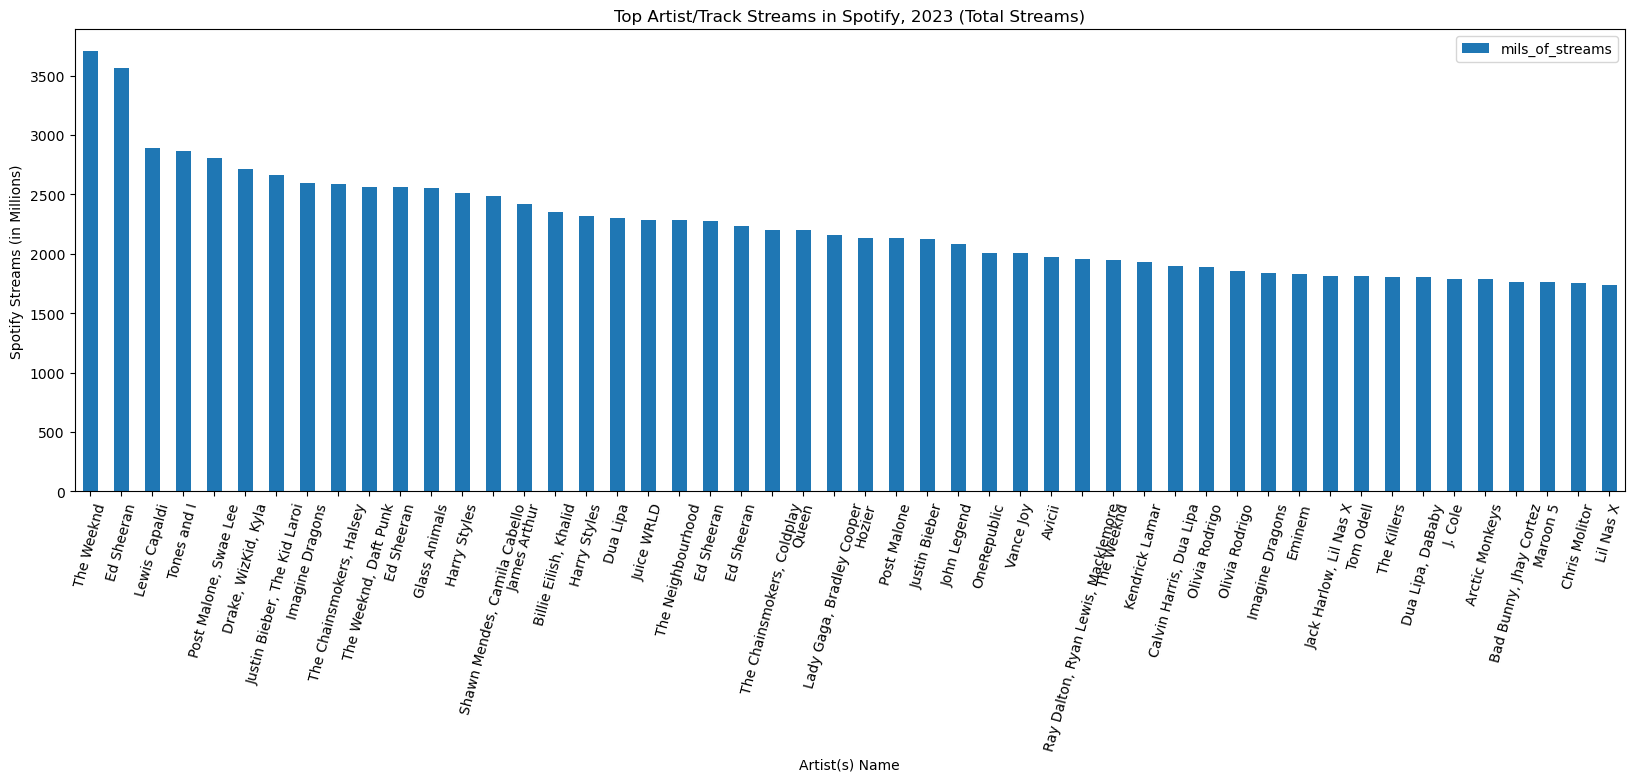

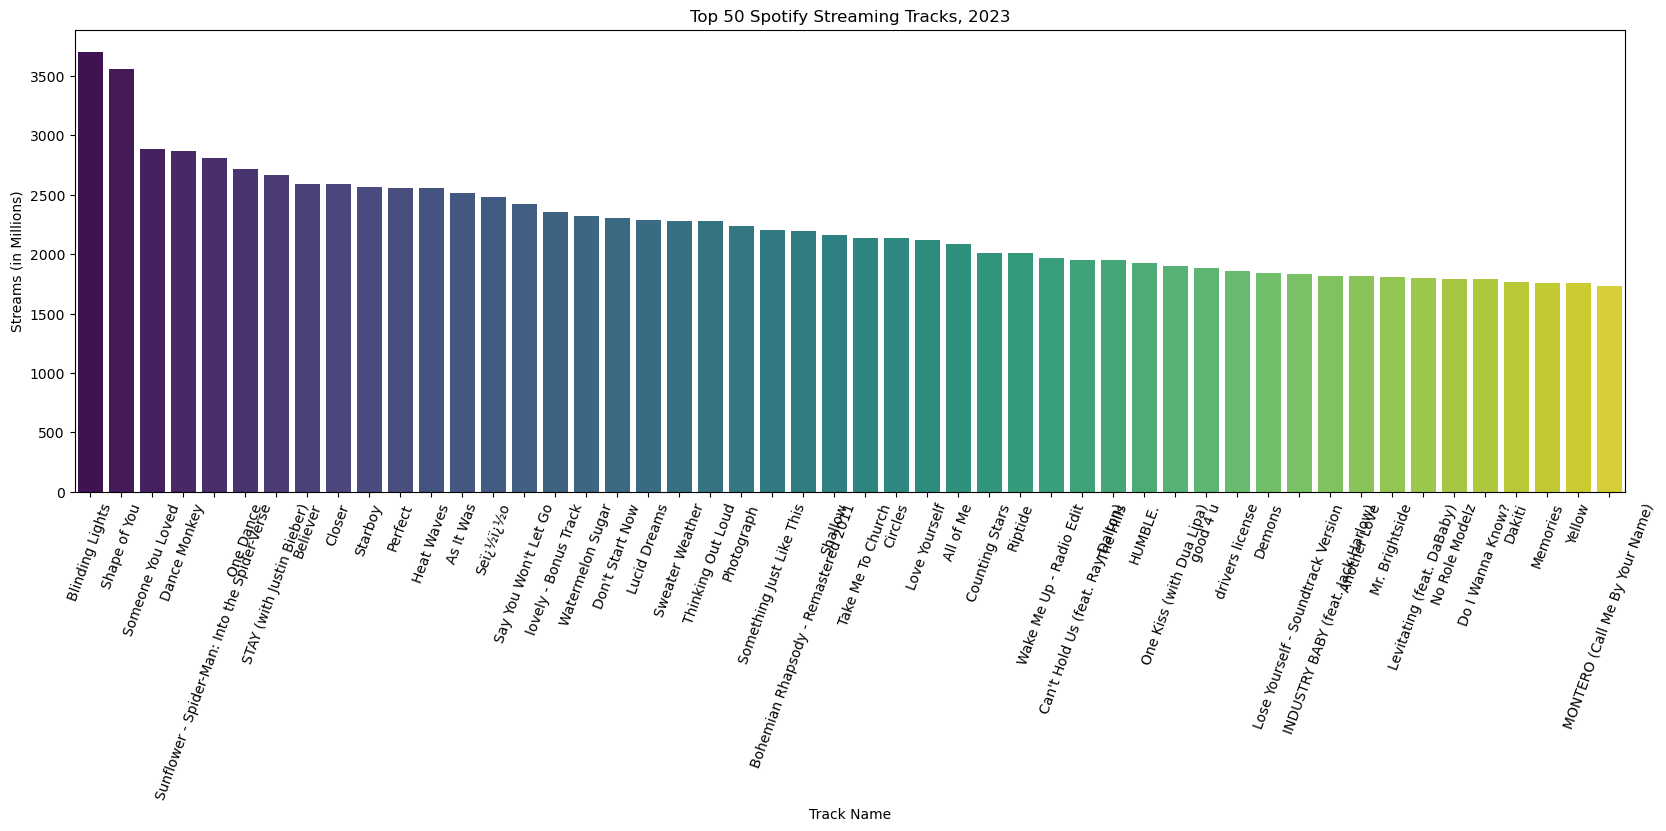

,artist(s)_name,track_name,mils_of_streams,in_spotify_playlists,in_spotify_charts
0,"Pharrell Williams, Nile Rodgers, Daft Punk",Get Lucky - Radio Edit,933.8156,52898,0
1,The Killers,Mr. Brightside,1806.6177,51979,15
2,Avicii,Wake Me Up - Radio Edit,1970.6733,50887,34
3,Nirvana,Smells Like Teen Spirit - Remastered 2021,1690.1929,49991,9
4,a-ha,Take On Me,1479.1151,44927,17


<Axes: title={'center': 'Top Artists in Spotify Playlists (2023)'}, xlabel='Artist(s) Name', ylabel='in Spotify Playlists'>

,artist(s)_name,track_name,mils_of_streams,in_spotify_playlists,in_spotify_charts
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),141.3817,553,147
1,Harry Styles,As It Was,2513.1885,23575,130
2,Miley Cyrus,Flowers,1316.8557,12211,115
3,Olivia Rodrigo,vampire,140.0040,1397,113
4,Arctic Monkeys,I Wanna Be Yours,1297.0262,12859,110


<Axes: title={'center': 'Top Artists in Spotify Charts (2023)'}, xlabel='Artist(s) Name', ylabel='Spotify Charts'>

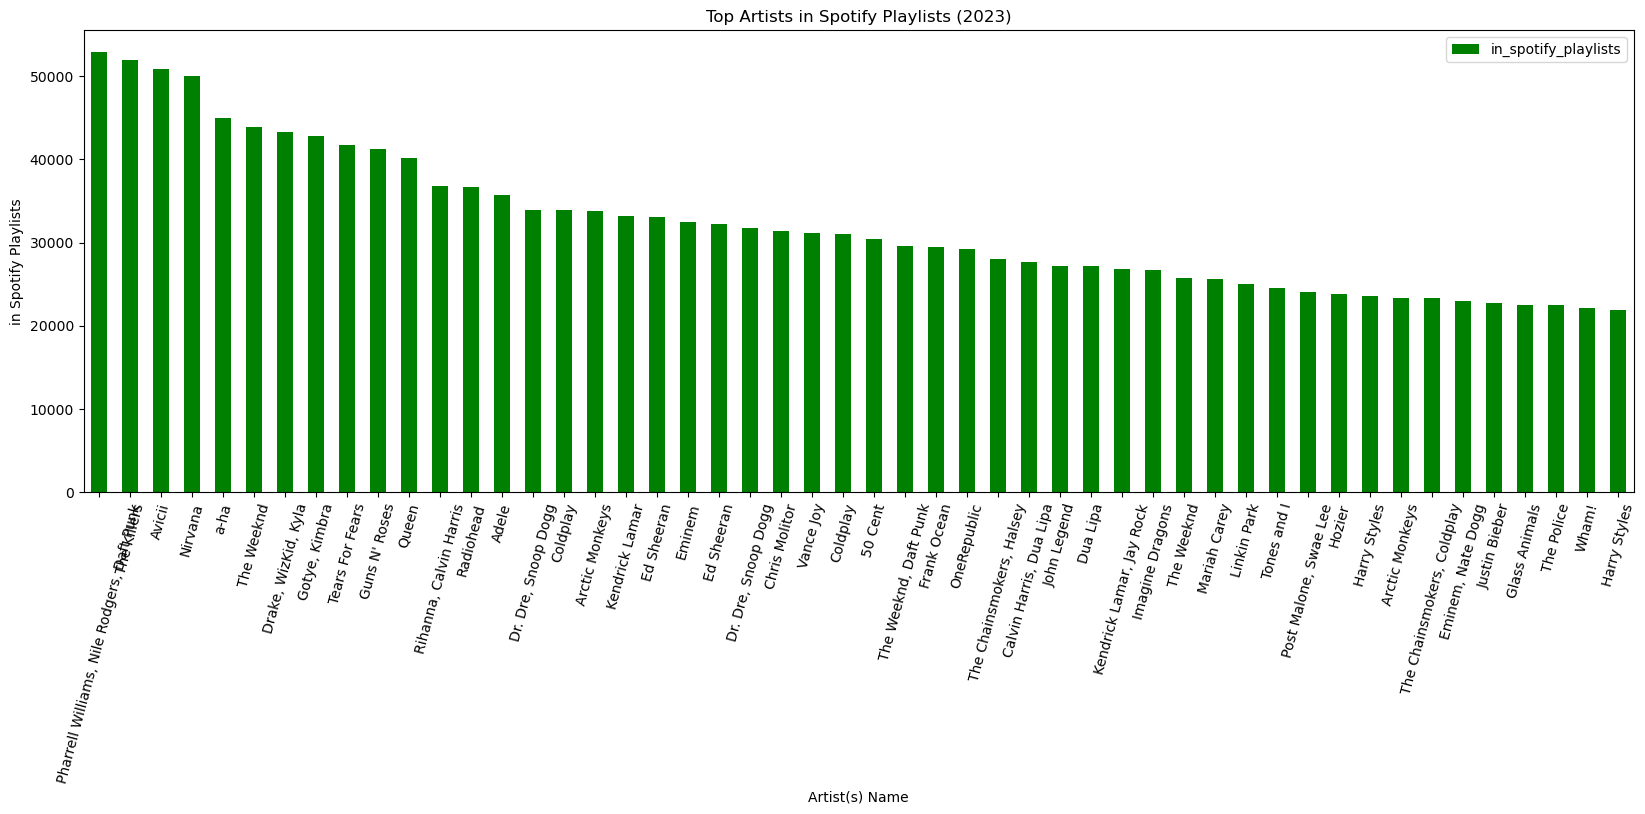

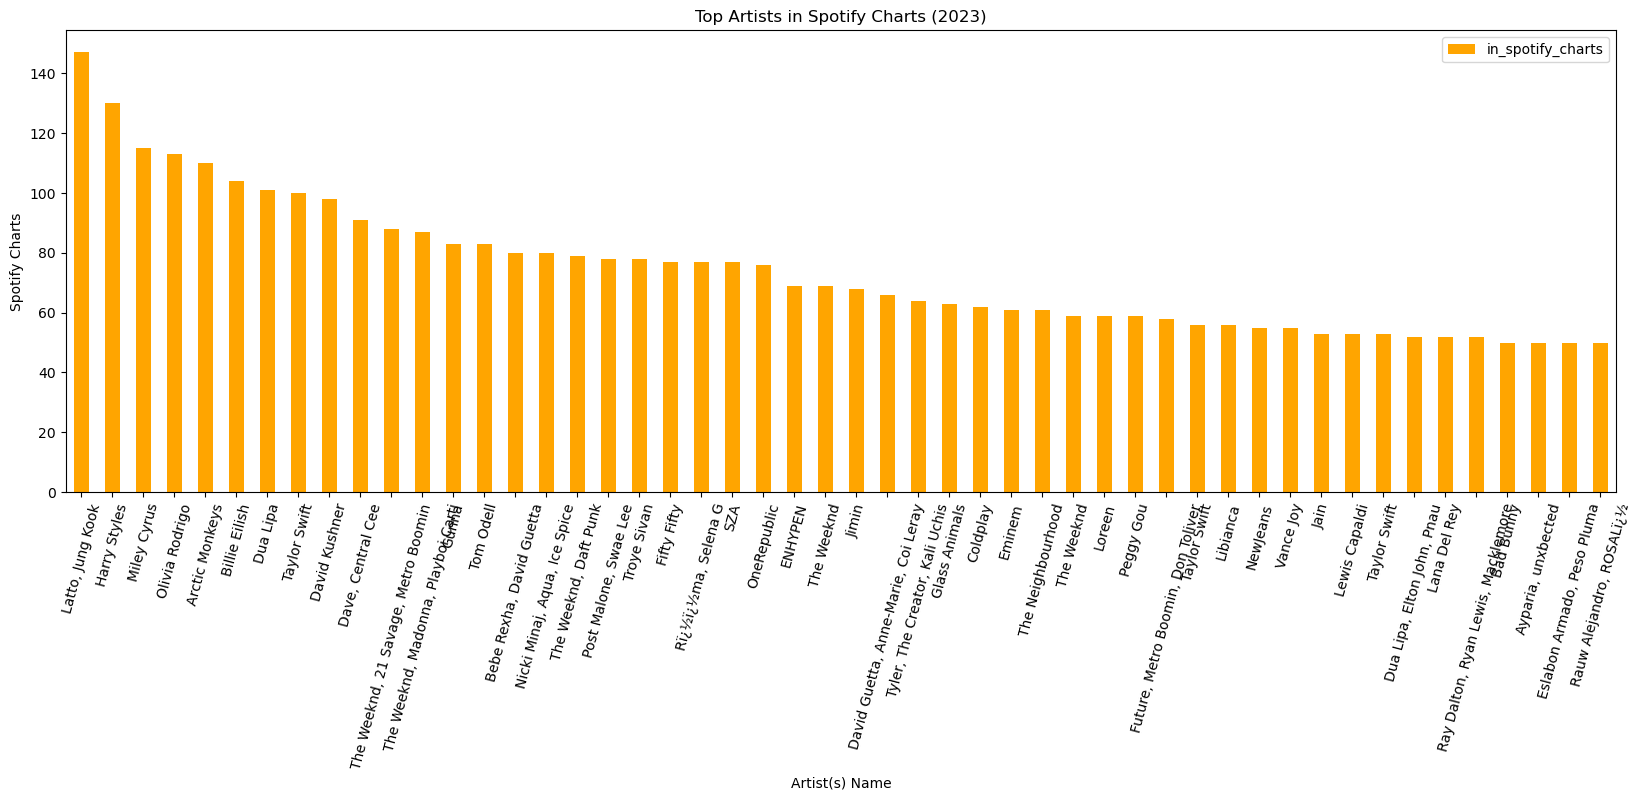

In [66]:
##########################################################
# (Will) Identify The Top Spotify Artists
##########################################################
artists_spotify = df_mils[['artist(s)_name', 'track_name', 
                    'mils_of_streams', 'in_spotify_playlists', 'in_spotify_charts']]

############################################################################################
# Most popular Artist/Track on Spotify, by Millions of Streams (using Pandas Dataframe plot)
############################################################################################
top_streams_df = artists_spotify.sort_values('mils_of_streams', ascending=False).head(50)
display(top_streams_df.reset_index(drop=True).head())

display(top_streams_df.plot(kind='bar',                 
                title = 'Top Artist/Track Streams in Spotify, 2023 (Total Streams)',
                x='artist(s)_name', y='mils_of_streams',
                xlabel='Artist(s) Name', rot=75, # horizontalalignment="center",
                ylabel='Spotify Streams (in Millions)',
                figsize=[20,6]))

############################################################################################
# (Will) Top 50 Spotify Streaming Tracks, 2023 (using Seaborn plot)
# #########################################################
# barplot(data, x, y, hue, order, hue_order, estimator, 
#         errorbar, n_boot, units, seed, orient, color, palette, saturation, 
#         width, errcolor, errwidth, capsize, dodge, ci, ax, **kwargs)
plt.figure(figsize=(20, 6))
sb.barplot(data = top_streams_df.sort_values('mils_of_streams', ascending=False), 
           x='track_name', y='mils_of_streams', 
           palette='viridis')
plt.title('Top 50 Spotify Streaming Tracks, 2023')
plt.xlabel('Track Name')
plt.xticks(rotation=70)
plt.ylabel('Streams (in Millions)')
plt.show()

##########################################################
# Most popular Artist/Track on Spotify, by Presence in Spotify Playlists
##########################################################
top_playlist_df = artists_spotify.sort_values('in_spotify_playlists', ascending=False).head(50)

display(top_playlist_df.reset_index(drop=True).head())
display(top_playlist_df.plot(kind='bar', 
                title = 'Top Artists in Spotify Playlists (2023)',
                x='artist(s)_name', y='in_spotify_playlists', 
                xlabel='Artist(s) Name', rot=75, # horizontalalignment="center",
                ylabel='in Spotify Playlists',
                color = 'green', figsize=[20,6]))

##########################################################
# Plot most popular Artist/Track on Spotify, by Spotify Charts
##########################################################
top_charts_df = artists_spotify.sort_values('in_spotify_charts', ascending=False).head(50)

display(top_charts_df.reset_index(drop=True).head())
display(top_charts_df.plot(kind='bar', 
                title = 'Top Artists in Spotify Charts (2023)',
                x='artist(s)_name', y='in_spotify_charts',
                xlabel='Artist(s) Name', rot=75, # horizontalalignment="center",
                ylabel='Spotify Charts',
                color = 'orange', figsize=[20,6])
)

,mils_of_streams,in_spotify_playlists,in_spotify_charts
track_name,,,
Blinding Lights,3703.8951,43899,69
Shape of You,3562.5439,32181,10
Someone You Loved,2887.2418,17836,53
Dance Monkey,2864.7917,24529,0
Sunflower - Spider-Man: Into the Spider-Verse,2808.0966,24094,78


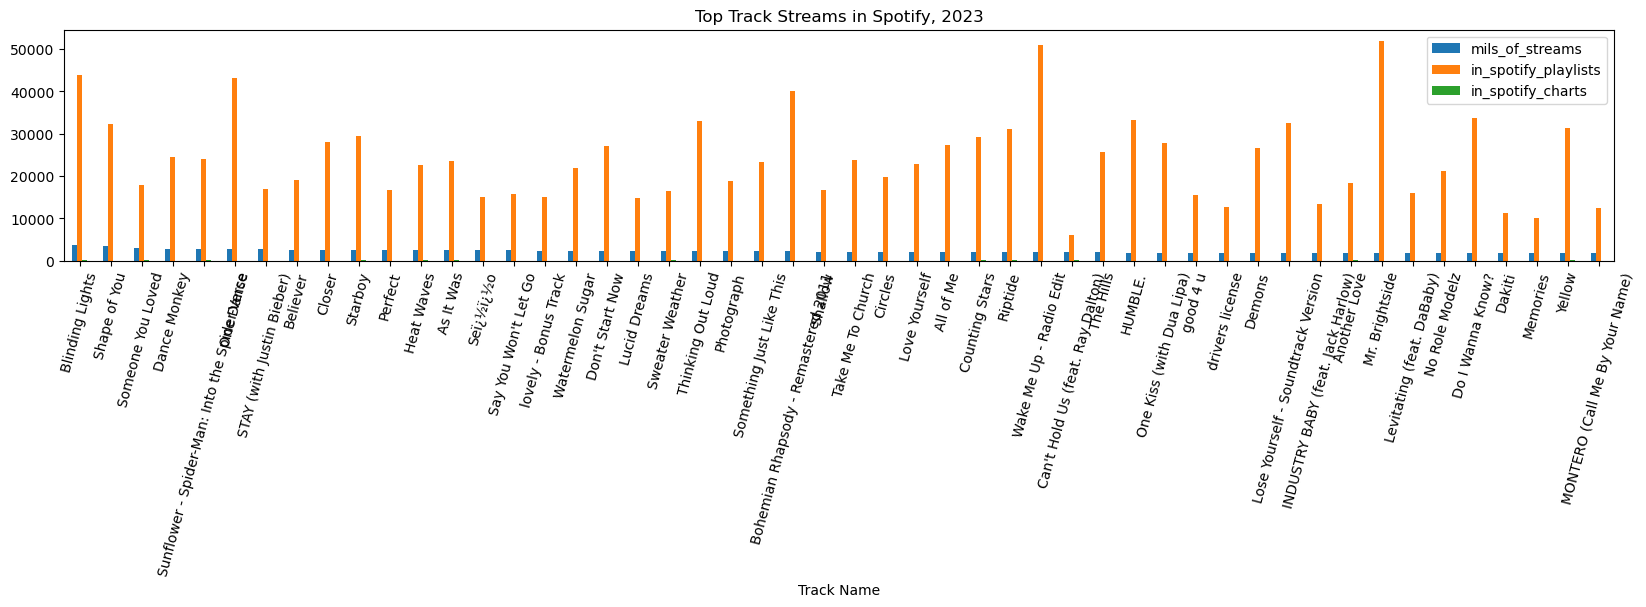

None

In [53]:
# TRY A MULTIPLOT for the tracks that are the top 20/50 in Streaming, including
# the number of Playlists and list the Charts

tracks_spotify_multi = df_mils[['track_name', 
                    'mils_of_streams', 'in_spotify_playlists', 'in_spotify_charts']]

top_streams_df = tracks_spotify_multi.sort_values('mils_of_streams', ascending=False).head(50)
top_streams_df.set_index(["track_name"],inplace=True)
display(top_streams_df.head())
 
# Use DataFrame.plot() in order to create a bar chart of the data
top_streams_df.plot(kind="bar", figsize=(20,3),
                 title = 'Top Track Streams in Spotify, 2023',
                 xlabel='Track Name', rot=75,      
                    )



# # Pandas can also plot multiple columns if the DataFrame includes them
# multi_plot = top_streams_df.plot(kind="bar", figsize=(20,5))

# # PandasPlot.set_xticklabels() can be used to set the tick labels as well
# multi_plot.set_xticklabels(top_streams_df["Track Name"], rotation=45)

# display(plt.show())
# plt.tight_layout()

# barplot(data, x, y, hue, order, hue_order, estimator, 
#         errorbar, n_boot, units, seed, orient, color, palette, saturation, 
#         width, errcolor, errwidth, capsize, dodge, ci, ax, **kwargs)
# sb.barplot(top_streams_df, x='track_name', y='mils_of_streams', palette='viridis')

In [18]:
df_mils.columns

Index(['release_date', 'track_name', 'artist(s)_name', 'artist_count',
       'in_spotify_playlists', 'in_spotify_charts', 'mils_of_streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

,track_name,release_date,mils_of_streams
0,Blinding Lights,2019-11-29,3703.8951
1,Shape of You,2017-01-06,3562.5439
2,Someone You Loved,2018-11-08,2887.2418
3,Dance Monkey,2019-05-10,2864.7917
4,Sunflower - Spider-Man: Into the Spider-Verse,2018-10-09,2808.0966
5,One Dance,2016-04-04,2713.9223
6,STAY (with Justin Bieber),2021-07-09,2665.3439
7,Believer,2017-01-31,2594.0401
8,Closer,2016-05-31,2591.2243
9,Starboy,2016-09-21,2565.5297


<Axes: title={'center': 'Release Year of Tops Songs Streamed in Spotify (2023)'}, xlabel='Song', ylabel='Year Released'>

,track_name,release_date,in_spotify_playlists
0,Get Lucky - Radio Edit,2013-01-01,52898
1,Mr. Brightside,2003-09-23,51979
2,Wake Me Up - Radio Edit,2013-01-01,50887
3,Smells Like Teen Spirit - Remastered 2021,1991-09-10,49991
4,Take On Me,1984-10-19,44927
5,Blinding Lights,2019-11-29,43899
6,One Dance,2016-04-04,43257
7,Somebody That I Used To Know,2011-01-01,42798
8,Everybody Wants To Rule The World,1985-02-17,41751
9,Sweet Child O' Mine,1987-01-01,41231


<Axes: title={'center': 'Release Year of Tops Songs in Spotify Playlists (2023)'}, xlabel='Song', ylabel='Year Released'>

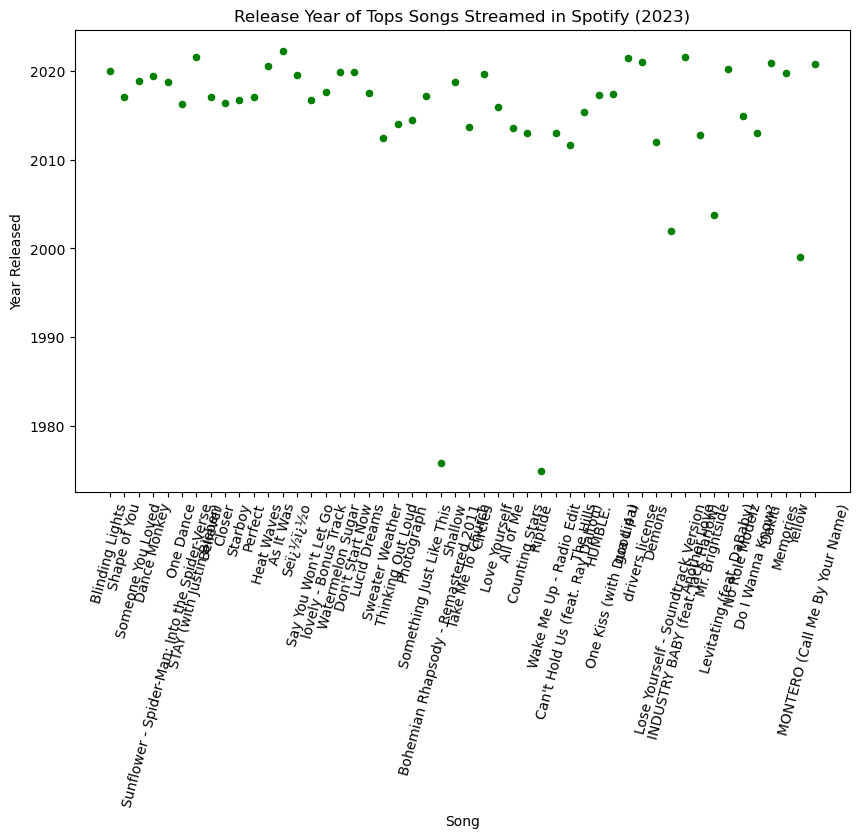

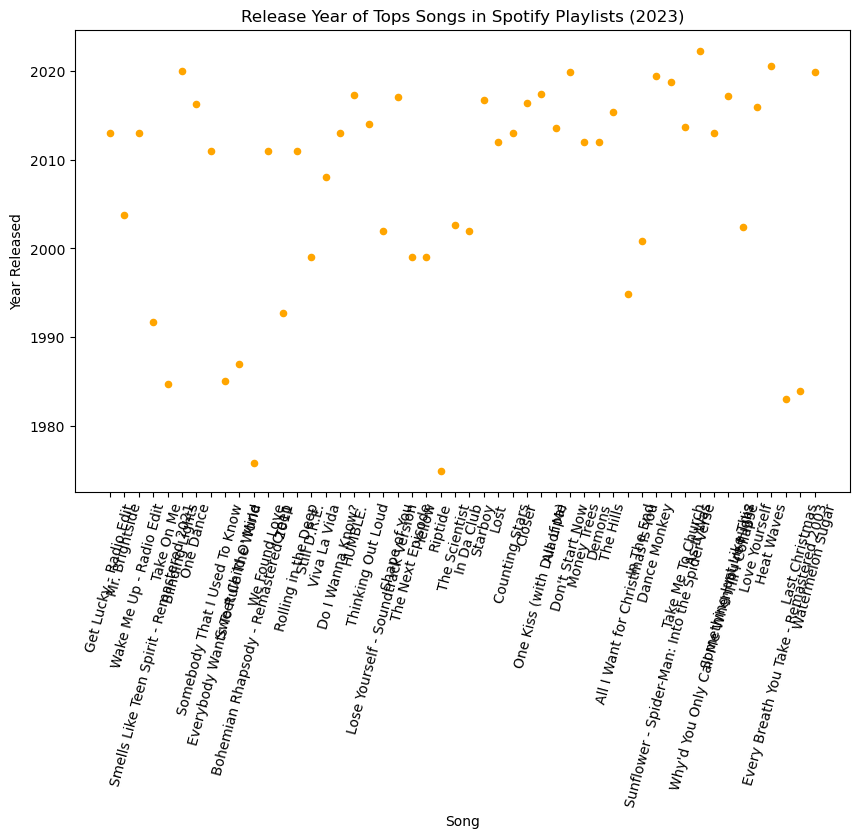

In [19]:
##########################################################
#  (Will) Investigate the year(s) of Release of the top Streamed Tracks in Spotify
#         Investigate the year(s) of Release of the top Tracks Added to Playlists
##########################################################
#  The artist/tracks that appeared in the most playlists were different than 
#    those with the most streams.  
#  Qualitative analysis shows that the songs most added to playlists were older than current values.
#  Plot the top most Streamed Tracks and show the Year They were Released.


# adult_names = titanic.loc[titanic["Age"] > 35, "Name"]


# Create a smaller DF that includes release_date, artist name, streams, spotify values
spotify_tracks_date = df_mils[['artist(s)_name', 'track_name', 'release_date',
                    'mils_of_streams', 'in_spotify_playlists', 'in_spotify_charts']]


# Top 20 Tracks by total Streams
top_streams_dates_df = spotify_tracks_date.sort_values('mils_of_streams', ascending=False).head(50)

# For the top tracks in Streams, what year were they released?
#  Plot the top most Streamed Tracks and show the Year They were Released.
display(top_streams_dates_df[['track_name', 'release_date', 'mils_of_streams']].reset_index(drop=True).head(10))
display(top_streams_dates_df.plot(kind='scatter', 
                title = 'Release Year of Tops Songs Streamed in Spotify (2023)',
                x='track_name', y='release_date', 
                xlabel='Song', rot=75, # horizontalalignment="center",
                ylabel='Year Released',
                color = 'green', figsize=[10,6]))


# Top 20 Tracks by total playlists
top_playlist_dates_df = spotify_tracks_date.sort_values('in_spotify_playlists', ascending=False).head(50)

# For the top tracks in Playlists, what year were they released?
#  Plot the top Tracks in Playlists and show the Year They were Released.
display(top_playlist_dates_df[['track_name', 'release_date', 'in_spotify_playlists']].reset_index(drop=True).head(10))
display(top_playlist_dates_df.plot(kind='scatter', 
                title = 'Release Year of Tops Songs in Spotify Playlists (2023)',
                x='track_name', y='release_date', 
                xlabel='Song', rot=75, # horizontalalignment="center",
                ylabel='Year Released',
                color = 'orange', figsize=[10,6]))




In [ ]:
##########################################################
# (Will) Do the top Spotify Streaming Tracks appear in other Service charts?
##########################################################

In [ ]:
##########################################################
# (Will) Identify the Keys of the most streamed Tracks
##########################################################

# Top 10 keys from all the top tracks in Spotify 2023 data
keys_counts = df_mils[['key']].value_counts().head(10)  
display(keys_counts)


# # Most Common Keys of the Top 50 Tracks
# key_count_top50 = df_mils.sort_values(df_mils[['key']].value_counts()



# artist_counts_charts = top_artists_charts_df['artist(s)_name'].value_counts().head(10)  # Top 10 artists
# display(artist_counts_charts)

In [ ]:


##########################################################
# Plot 
##########################################################
plt.figure(figsize=(12, 6))




# top_artists_charts_df

# sns.barplot(x=artist_counts.values, y=artist_counts.index, palette='viridis')
# plt.title('Top 10 Artists by Number of Tracks')
# plt.xlabel('Number of Tracks')
# plt.ylabel('Artist')
# plt.show()

# display(
#     top_artists_charts_df.plot(kind='bar', title = 'Top Artists in Spotify, 2023 (Spotify Charts)',
#                         x='artist(s)_name', y='in_spotify_charts',
#                         xlabel='Artist(s) Name', rot=75, # horizontalalignment="center",
#                         ylabel='Spotify Charts',
#                         color = 'orange',
#                         figsize=[10,2])
# )

key
C#     120
G       96
G#      91
F       89
B       81
D       81
A       75
F#      73
E       62
A#      57
Name: count, dtype: int64

artist(s)_name
Ed Sheeran                      2
Harry Styles                    2
Lewis Capaldi                   1
Tones and I                     1
Post Malone, Swae Lee           1
Drake, WizKid, Kyla             1
Justin Bieber, The Kid Laroi    1
Imagine Dragons                 1
The Chainsmokers, Halsey        1
The Weeknd, Daft Punk           1
Name: count, dtype: Int64

<Figure size 1200x600 with 0 Axes>

artist(s)_name
Taylor Swift        34
The Weeknd          22
Bad Bunny           19
SZA                 19
Harry Styles        17
Kendrick Lamar      12
Morgan Wallen       11
Ed Sheeran           9
Feid                 8
Drake, 21 Savage     8
Name: count, dtype: Int64

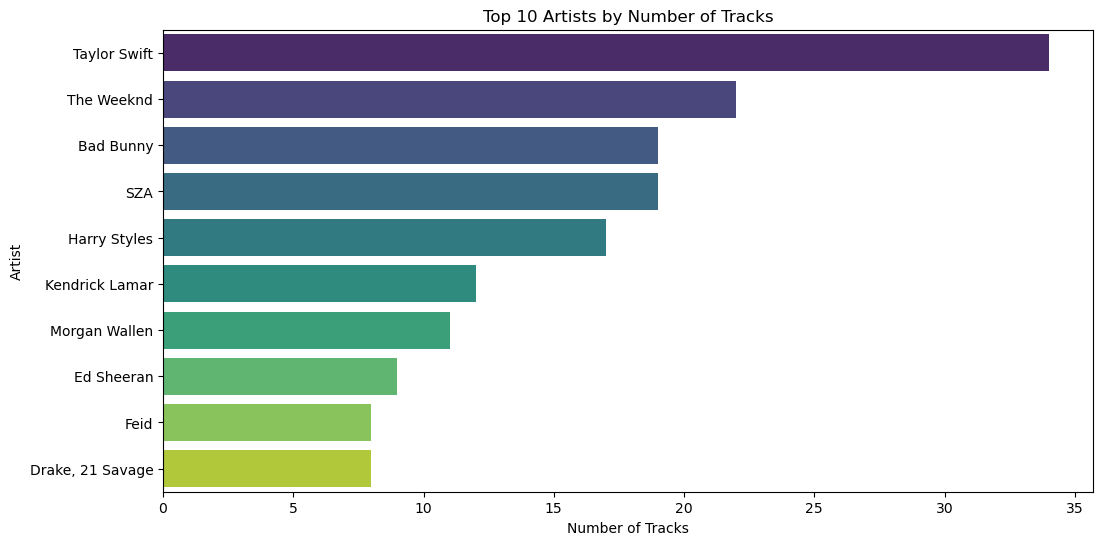

In [23]:
##########################################################
# (Shubhda) Visualization 1: Bar Plot - Number of tracks by artist
###########################################################

plt.figure(figsize=(12, 6))
artist_counts = df_mils['artist(s)_name'].value_counts().head(10)  # Top 10 artists
display(artist_counts)
sb.barplot(x=artist_counts.values, y=artist_counts.index, palette='viridis')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()